In [1]:
cd "~/Snudda"

/home/ubuntu/Snudda


### The network has been already built on the Striatum_100.ipynb. We are skipping the creation and going directly to the simulation part.

## Simulate the network

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.

In [3]:
!snudda init networks/tinySim --size 100 --overwrite

Creating config file
Network path: networks/tinySim
CreateConfig
Using 1 functional channels
Adding Striatum with 100 neurons
Using cube for striatum
Creating cube mesh
File: networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00010749824478388102
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00010749824478388102
Adding neurons: FSN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/fs
Adding neurons: dSPN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/dspn
Adding neurons: iSPN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/ispn
Adding neurons: ChIN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002]

Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [ ]:
!snudda place networks/tinySim

Detect the apposition points where axons and dendrites of different neurons overlap.  
**NOTE**: this takes about 10 minutes on a common desktop.

In [ ]:
!snudda detect networks/tinySim

Prune the detected appositions to get the set of synapses.

In [ ]:
!snudda prune networks/tinySim

Generate external input events for the network. A 1 second duration of the simulation is reserved.

### The input generation command was rerun on this notebook.
The original command created only a 1 second long input, which was ok for the 100ms and 500ms simulations. Since here we are running the simulation for 2 seconds, the input duration needed to be longer

In [ ]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 3.0

### Compile MOD files
*not necessary - requirementes are already met by following the instructions.txt*

In [ ]:
#!nrnivmodl snudda/data/cellspecs-v2/mechanisms

### Run the simulation

Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. Try 100 milliseconds for a very short simulation. -> *if we are increasing simulation time, increase input time as well*

**NOTE**: this takes about 15 minutes on a common desktop. -- *took 11 minutes*

#### Here we run a 500 ms simulation, took about 3 hours.

In [ ]:
!snudda simulate networks/tinySim --time 2 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt3.txt

## Plot simulation results

In [2]:
#from ipywidgets import *
import matplotlib.pyplot as plt 
#%matplotlib widget

See the spike raster plot for all cell types.

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7034 synapses and 10000 gap junctions
Load done. 0.09629248175770044
Sort the traces
Sort the traces


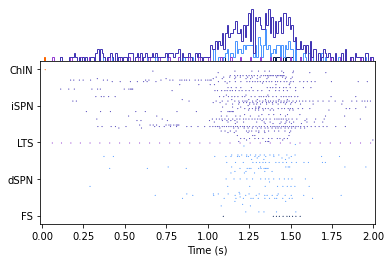

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [3]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 2
#%matplotlib widget
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Check voltage traces for randomly the selected cells.

In [ ]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/tinySim/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
#%matplotlib widget    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Simulation analysis plots are saved as PDF files in the directory `networks/tinySim/figures`.

In [ ]:
!ls networks/tinySim/figures/*.pdf

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).